In [ ]:
import sys

sys.path.append("/home/simon_g/MICCAI_SUBMISSION/GENUINE/")
import torch
from GENUINE.data.datasets import PatchDataset
from GENUINE.utils.device import best_gpu
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
import umap.plot
import pandas as pd
from tqdm import tqdm
import h5py

In [ ]:
model = torch.load("/home/simon_g/.GENUINE/GENUINE_E.model")
model.eval();

In [ ]:
dataset_path = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/SAMPLE_TIFS/H5/DATASET.h5"
dataset = PatchDataset(dataset_path, "train", no_transform=True, ret_id=True, n=1000)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

device = best_gpu()

model.to(device);

In [ ]:
fss, ys, y_hats, ids = [], [], [], []
for X, y, _id in tqdm(dataloader):
    
    y = y.squeeze()

    fs = model(X.to(device), ret_fs=True).detach().cpu().numpy()
    y_hat = model(X.to(device)).detach().cpu().numpy().squeeze()
    
    fss.extend(fs)
    ys.extend(y)
    y_hats.extend(y_hat)
    ids.extend([f"T{x}" for x in _id.squeeze()])

In [ ]:
np_fss = np.array(fss).squeeze()
np_ys = np.array(ys).squeeze()
np_y_hats = np.array(y_hats).squeeze()

In [ ]:
mapper = umap.UMAP().fit(np_fss)
emb = mapper.transform(np_fss)

hover_data = pd.DataFrame({'index': np.arange(len(np_ys)),
                           'label': np_ys.squeeze(),
                           "id": ids,
                           'x': emb[:,0],
                           'y': emb[:,1]})


umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=ids)
umap.plot.show(p)

umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=np_ys.squeeze().astype(int))
umap.plot.show(p)

In [ ]:
dataset_path = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/SAMPLE_TIFS/H5_EVAL/DILUTIONS.h5"

with h5py.File(dataset_path, 'r') as f:
    samples = list(f.keys())
    
for n, sample in enumerate(samples):
    dataset = PatchDataset(dataset_path, sample, no_transform=True, n=512)
    dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

    for X, y in tqdm(dataloader):
        
        y = y.squeeze()

        fs = model(X.to(device), ret_fs=True).detach().cpu().numpy()
        y_hat = model(X.to(device)).detach().cpu().numpy().squeeze()
        
        fss.extend(fs)
        ys.extend(y)
        y_hats.extend(y_hat)
        ids.extend([sample]*X.shape[0])

        #ids.extend([n + np_ids.max()]*X.shape[0])
        
    print(sample, (np.array(y_hats[-len(dataset):])>0).sum()/len(dataset))

In [ ]:
new_fss = np.array(fss).squeeze()
new_ys = np.array(ys).squeeze()
new_y_hats = np.array(y_hats).squeeze()

In [ ]:
mapper = umap.UMAP().fit(new_fss)
emb = mapper.transform(new_fss)

hover_data = pd.DataFrame({'index': np.arange(len(new_ys)),
                           'label': new_ys.squeeze(),
                           "id": ids,
                           'x': emb[:,0],
                           'y': emb[:,1]})


umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=ids)
umap.plot.show(p)

umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=(new_y_hats > 0).squeeze().astype(int))
umap.plot.show(p)

In [ ]:
model = torch.load("/home/simon_g/.GENUINE/GENUINE.model")
model.eval();

dataset_path = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/SAMPLE_TIFS/H5/DATASET.h5"
dataset = PatchDataset(dataset_path, "train", no_transform=True, ret_id=True, n=512)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

device = best_gpu()

model.to(device);

fss, ys, y_hats, ids = [], [], [], []
for X, y, _id in tqdm(dataloader):
    
    y = y.squeeze()

    y_hat, fs, box_fs = model(X.to(device), ret_fs=True)
        
    fss.extend(np.concatenate((box_fs.flatten(1).detach().cpu().numpy(), fs.flatten(1).detach().cpu().numpy()), axis=1))
    ys.extend(y)
    y_hats.extend(y_hat.detach().cpu().numpy())
    ids.extend([f"T{x}" for x in _id.squeeze()])
    
np_fss = np.array(fss).squeeze()
np_ys = np.array(ys).squeeze()
np_y_hats = np.array(y_hats).squeeze()
np_ids = np.array(ids).squeeze()

mapper = umap.UMAP().fit(np_fss)
emb = mapper.transform(np_fss)

hover_data = pd.DataFrame({'index': np.arange(len(np_ys)),
                           'label': np_ys.squeeze(),
                           "id": np_ids.squeeze(),
                           'x': emb[:,0],
                           'y': emb[:,1]})


umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=ids)
umap.plot.show(p)

umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=np_ys.squeeze().astype(int))
umap.plot.show(p)

In [ ]:
dataset_path = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/SAMPLE_TIFS/H5_EVAL/DILUTIONS.h5"

with h5py.File(dataset_path, 'r') as f:
    samples = list(f.keys())
    
for n, sample in enumerate(samples):
    dataset = PatchDataset(dataset_path, sample, no_transform=True, n=64)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    for X, y in tqdm(dataloader):
        
        y = y.squeeze()

        y_hat, fs, box_fs = model(X.to(device), ret_fs=True)
        
        fss.extend(np.concatenate((box_fs.flatten(1).detach().cpu().numpy(), fs.flatten(1).detach().cpu().numpy()), axis=1))
        ys.extend(y)
        y_hats.extend(y_hat.detach().cpu().numpy())
        ids.extend([sample]*X.shape[0])

    print(sample, (np.array(y_hats[-len(dataset):])>0).sum()/len(dataset))
    
new_fss = np.array(fss).squeeze()
new_ys = np.array(ys).squeeze()
new_y_hats = np.array(y_hats).squeeze()
new_ids = np.array(ids).squeeze()

In [ ]:
mapper = umap.UMAP().fit(new_fss)
emb = mapper.transform(new_fss)

hover_data = pd.DataFrame({'index': np.arange(len(new_ys)),
                           'label': new_ys.squeeze(),
                           "id": new_ids.squeeze(),
                           'x': emb[:,0],
                           'y': emb[:,1]})


umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=ids)
umap.plot.show(p)

umap.plot.output_notebook()
p = umap.plot.interactive(mapper, hover_data=hover_data, point_size=5, labels=(new_y_hats > 0).squeeze().astype(int))
umap.plot.show(p)

In [ ]:
from GENUINE.utils.image_norm import normalize_image
from GENUINE.utils.segmentation import segment_images
from GENUINE.utils.visualize import rand_col_seg, bbox_on_image
import matplotlib.pyplot as plt

image_dir = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/processed/"

m, i = segment_images(image_dir, "S19", 1, model_kwargs={"model_type":"/home/simon_g/.cellpose/models/CP_clusters_final"}, diameter=40, norm_image=lambda x: x)

In [ ]:
plt.imshow(i[0])
plt.axis("off")
plt.show()

plt.imshow(rand_col_seg(m[0]))
plt.axis("off")
plt.show()

plt.imshow(normalize_image(i[0], m[0]))
plt.axis("off")

In [ ]:
model = torch.load("/home/simon_g/.GENUINE/GENUINE_B.model")

dataset_path = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/SAMPLE_TIFS/H5/DATASET.h5"
dataset = PatchDataset(dataset_path, "train", no_transform=True, n=1000)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

device = best_gpu()

model.to(device);
plt.rcParams["figure.figsize"] = 20,20

In [ ]:
for X,y in dataloader:
    
    y_hat, box_fs = model(X.to(device), ret_fs=True)
    
    bbox_on_image((X.squeeze().numpy().transpose(1,2,0), box_fs.numpy()), threshold=.3)

In [37]:
model = torch.load("/home/simon_g/.GENUINE/GENUINE.model")
model.eval();

dataset_path = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/SAMPLE_TIFS/H5_EVAL/DILUTIONS.h5"
dataset = PatchDataset(dataset_path, "S1b", no_transform=True, n=512)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

device = best_gpu()

model.to(device);

fss, ys, y_hats, ids, Xs = [], [], [], [], []
for X, y in tqdm(dataloader):
    
    y = y.squeeze()

    y_hat, fs, box_fs = model(X.to(device), ret_fs=True)
        
    fss.extend(np.concatenate((box_fs.flatten(1).detach().cpu().numpy(), fs.flatten(1).detach().cpu().numpy()), axis=1))
    ys.extend(y)
    y_hats.extend(y_hat.detach().cpu().numpy().squeeze())
    Xs.append(X.numpy().transpose(0, 2, 3, 1))

100%|██████████| 16/16 [00:20<00:00,  1.31s/it]


In [38]:
Xs = np.concatenate(Xs, axis=0)
y_hats = np.array(y_hats)

In [39]:
Xs.shape

(512, 144, 144, 3)

466


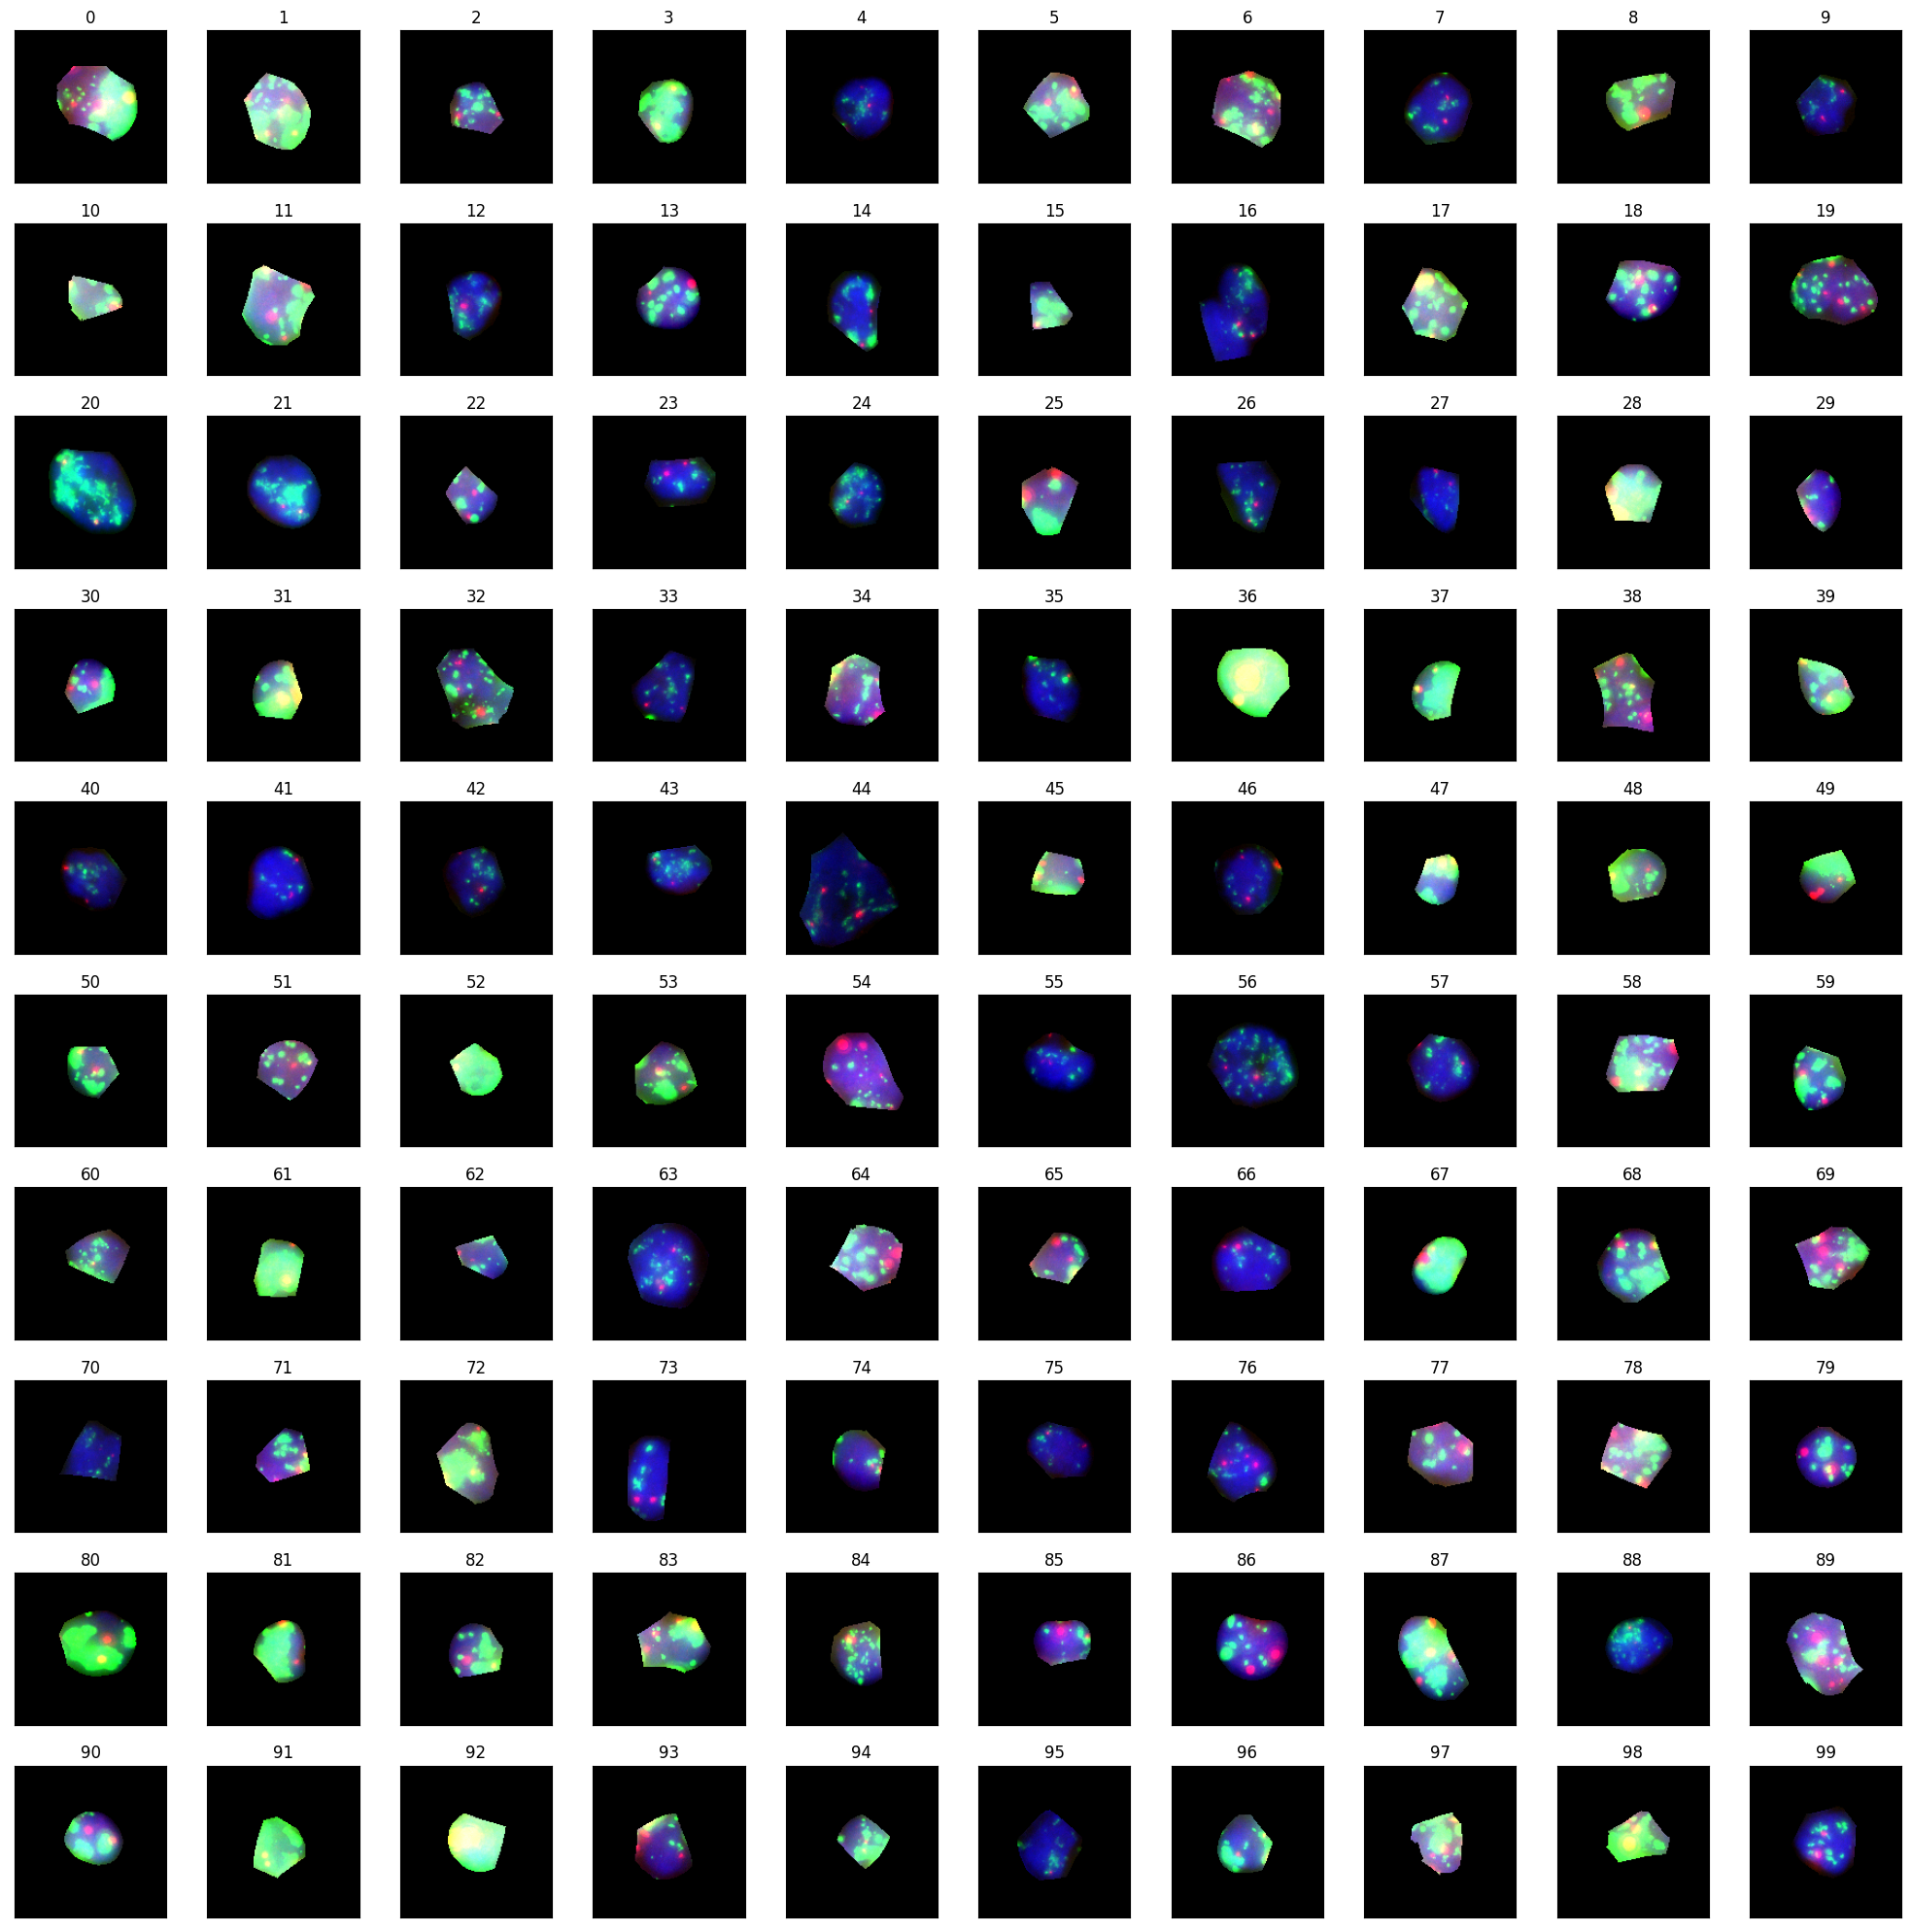

In [41]:
from GENUINE.utils.visualize import gridPlot
gridPlot(Xs[y_hats > 0])